#### Objective:
##### The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Preparation:

In [2]:
data = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


#### 2. Exploratory Data Analysis (EDA):

In [3]:
data.shape

(908, 13)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


##### Check for missing values

In [6]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data.fillna(data['oldpeak'].mean(),inplace=True)

In [8]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [9]:
data['exang'] = data['exang'].replace({'TURE':True,'FALSE':False,'True':True,'False':False})
data['exang'] = data['exang'].astype(str)

C:\Users\HP\AppData\Local\Temp\ipykernel_16356\828167055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['exang'] = data['exang'].replace({'TURE':True,'FALSE':False,'True':True,'False':False})


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
data.duplicated().sum()

np.int64(1)

In [12]:
data.drop_duplicates(ignore_index=True,inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

#### 3. Feature Engineering:

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [15]:
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])
data['fbs'] = le.fit_transform(data['fbs'])
data['restecg'] = le.fit_transform(data['restecg'])
data['exang'] = le.fit_transform(data['exang'])
data['slope'] = le.fit_transform(data['slope'])
data['thal'] = le.fit_transform(data['thal'])
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,0,125,0,0,1,120,0,1.500000,2,2,4
903,62,1,0,166,170,0,2,120,1,3.000000,1,2,4
904,56,1,2,170,0,0,0,123,1,2.500000,0,1,4
905,56,1,2,144,208,1,2,105,1,0.891253,0,0,4


In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,0.790518,0.776185,133.412348,201.465270,0.203969,0.990077,135.976847,0.410143,0.892236,1.156560,1.187431,1.007718
std,9.162016,0.407163,0.958041,20.405432,112.158285,0.403169,0.634643,26.813075,0.492131,1.055993,0.690337,0.735520,1.144594
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.500000,1.000000,0.000000,120.000000,176.500000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.800000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [17]:
data.corr(numeric_only=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.051947,-0.068305,0.253709,-0.100059,0.177004,-0.008336,-0.327868,0.192202,0.233265,-0.053886,0.058829,0.326227
sex,0.051947,1.000000,-0.125986,0.015988,-0.191632,0.092480,0.077376,-0.178484,0.186884,0.101743,-0.044191,0.068596,0.259258
cp,-0.068305,-0.125986,1.000000,0.007944,0.071005,-0.044562,-0.074455,0.249440,-0.345866,-0.169497,0.094762,-0.079809,-0.314480
trestbps,0.253709,0.015988,0.007944,1.000000,0.117392,0.112124,0.056824,-0.132841,0.151086,0.153034,0.008262,0.056620,0.136581
chol,-0.100059,-0.191632,0.071005,0.117392,1.000000,-0.113651,-0.195021,0.198074,-0.037256,0.028901,0.047655,-0.016900,-0.239065
fbs,0.177004,0.092480,-0.044562,0.112124,-0.113651,1.000000,0.068311,-0.065827,0.028502,0.022296,-0.027616,-0.017400,0.156839
restecg,-0.008336,0.077376,-0.074455,0.056824,-0.195021,0.068311,1.000000,-0.194343,0.083724,-0.030135,-0.082107,-0.111874,0.035053
thalch,-0.327868,-0.178484,0.249440,-0.132841,0.198074,-0.065827,-0.194343,1.000000,-0.348668,-0.129435,0.223212,0.005985,-0.322632
exang,0.192202,0.186884,-0.345866,0.151086,-0.037256,0.028502,0.083724,-0.348668,1.000000,0.371124,-0.159975,0.086220,0.358837
oldpeak,0.233265,0.101743,-0.169497,0.153034,0.028901,0.022296,-0.030135,-0.129435,0.371124,1.000000,-0.186815,0.090359,0.417724


##### Data Visualization

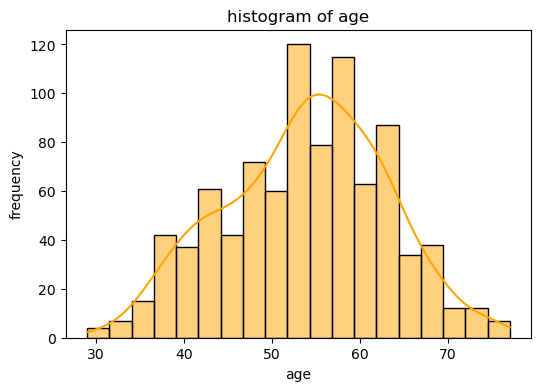

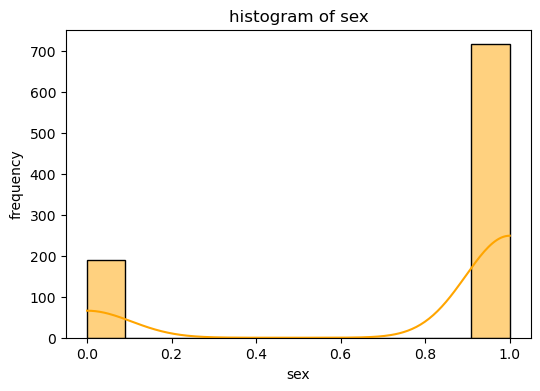

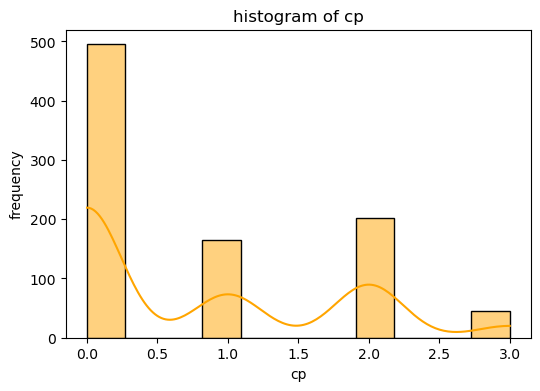

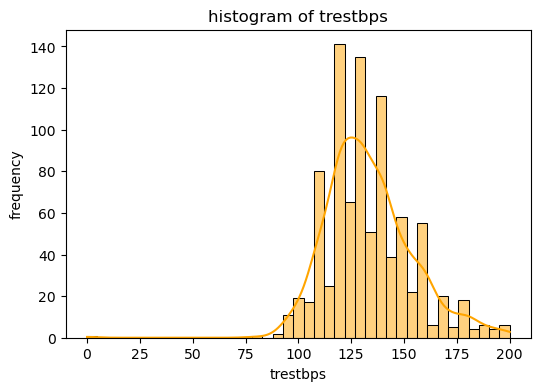

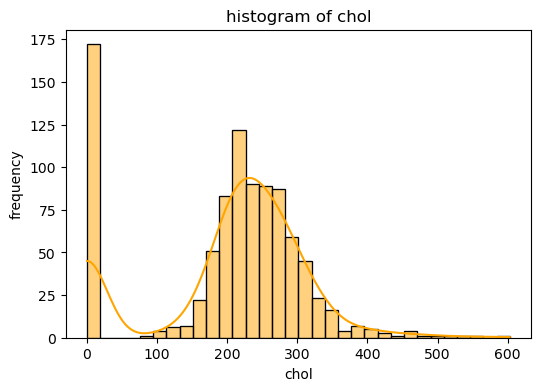

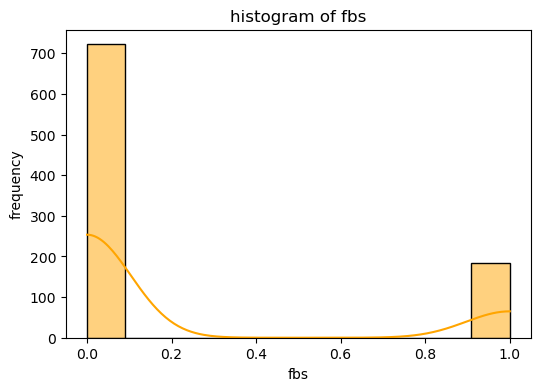

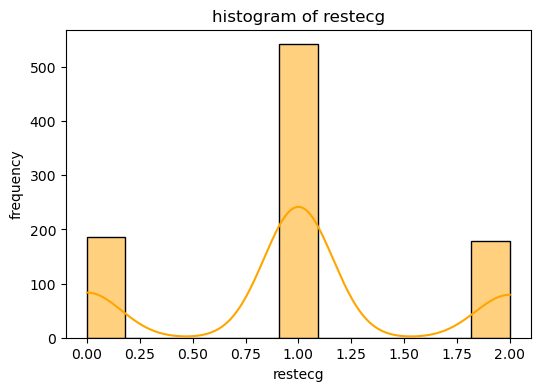

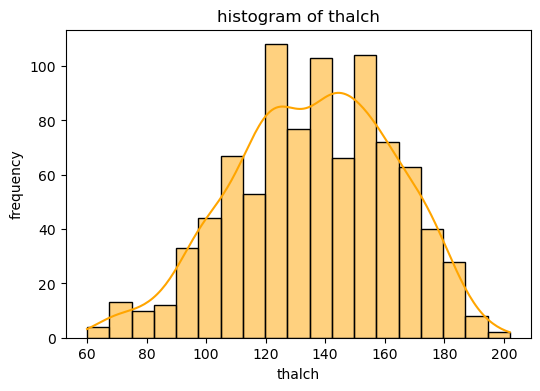

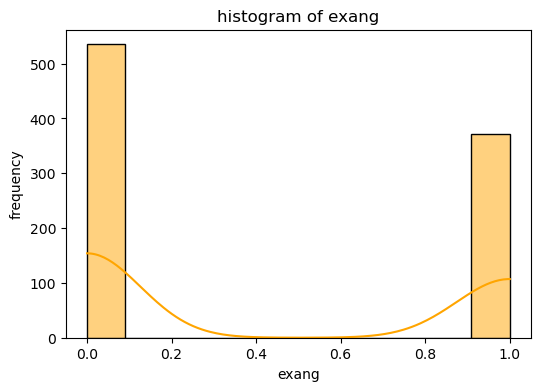

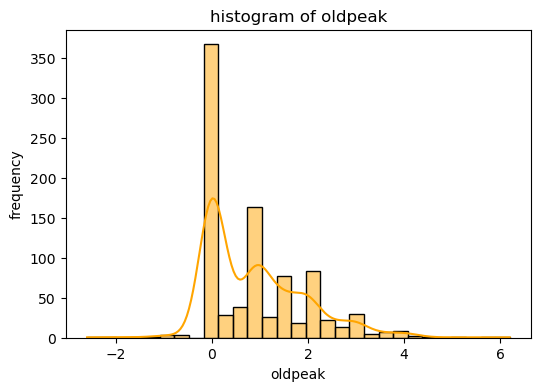

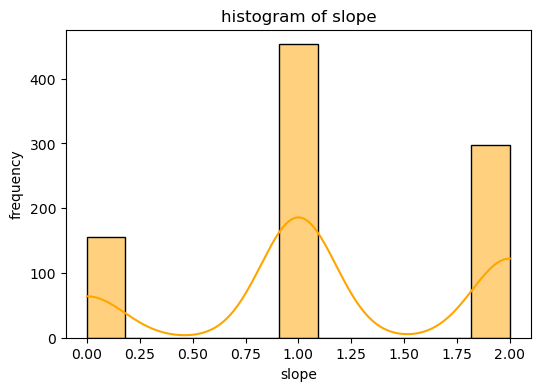

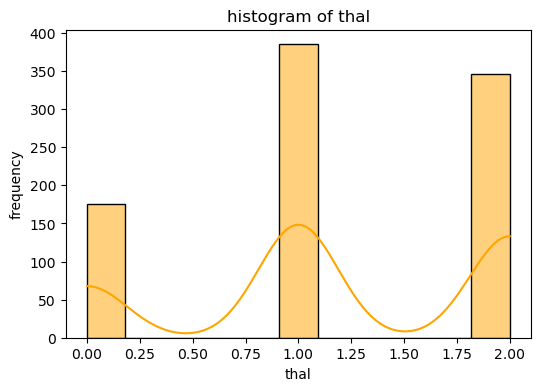

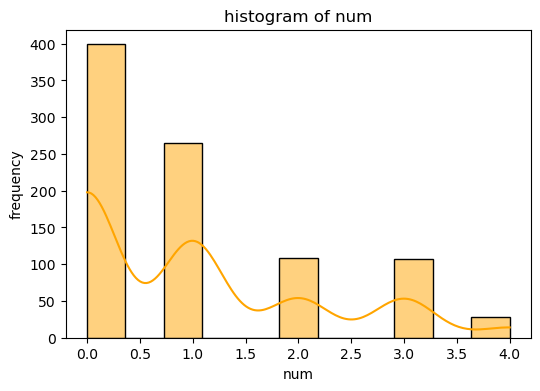

In [18]:
#creating histogram

for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

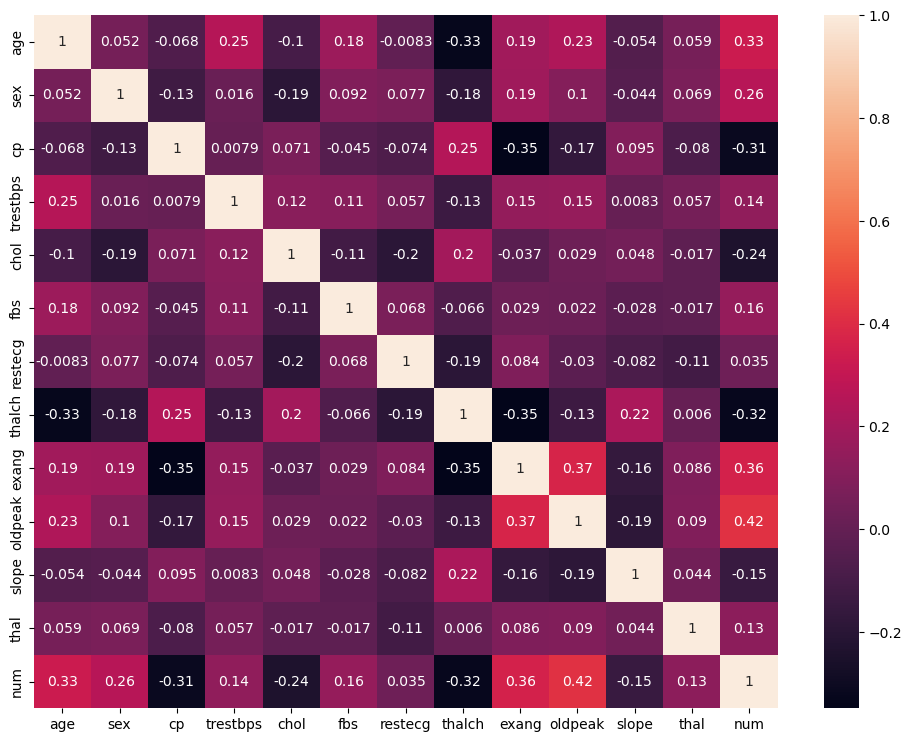

In [19]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

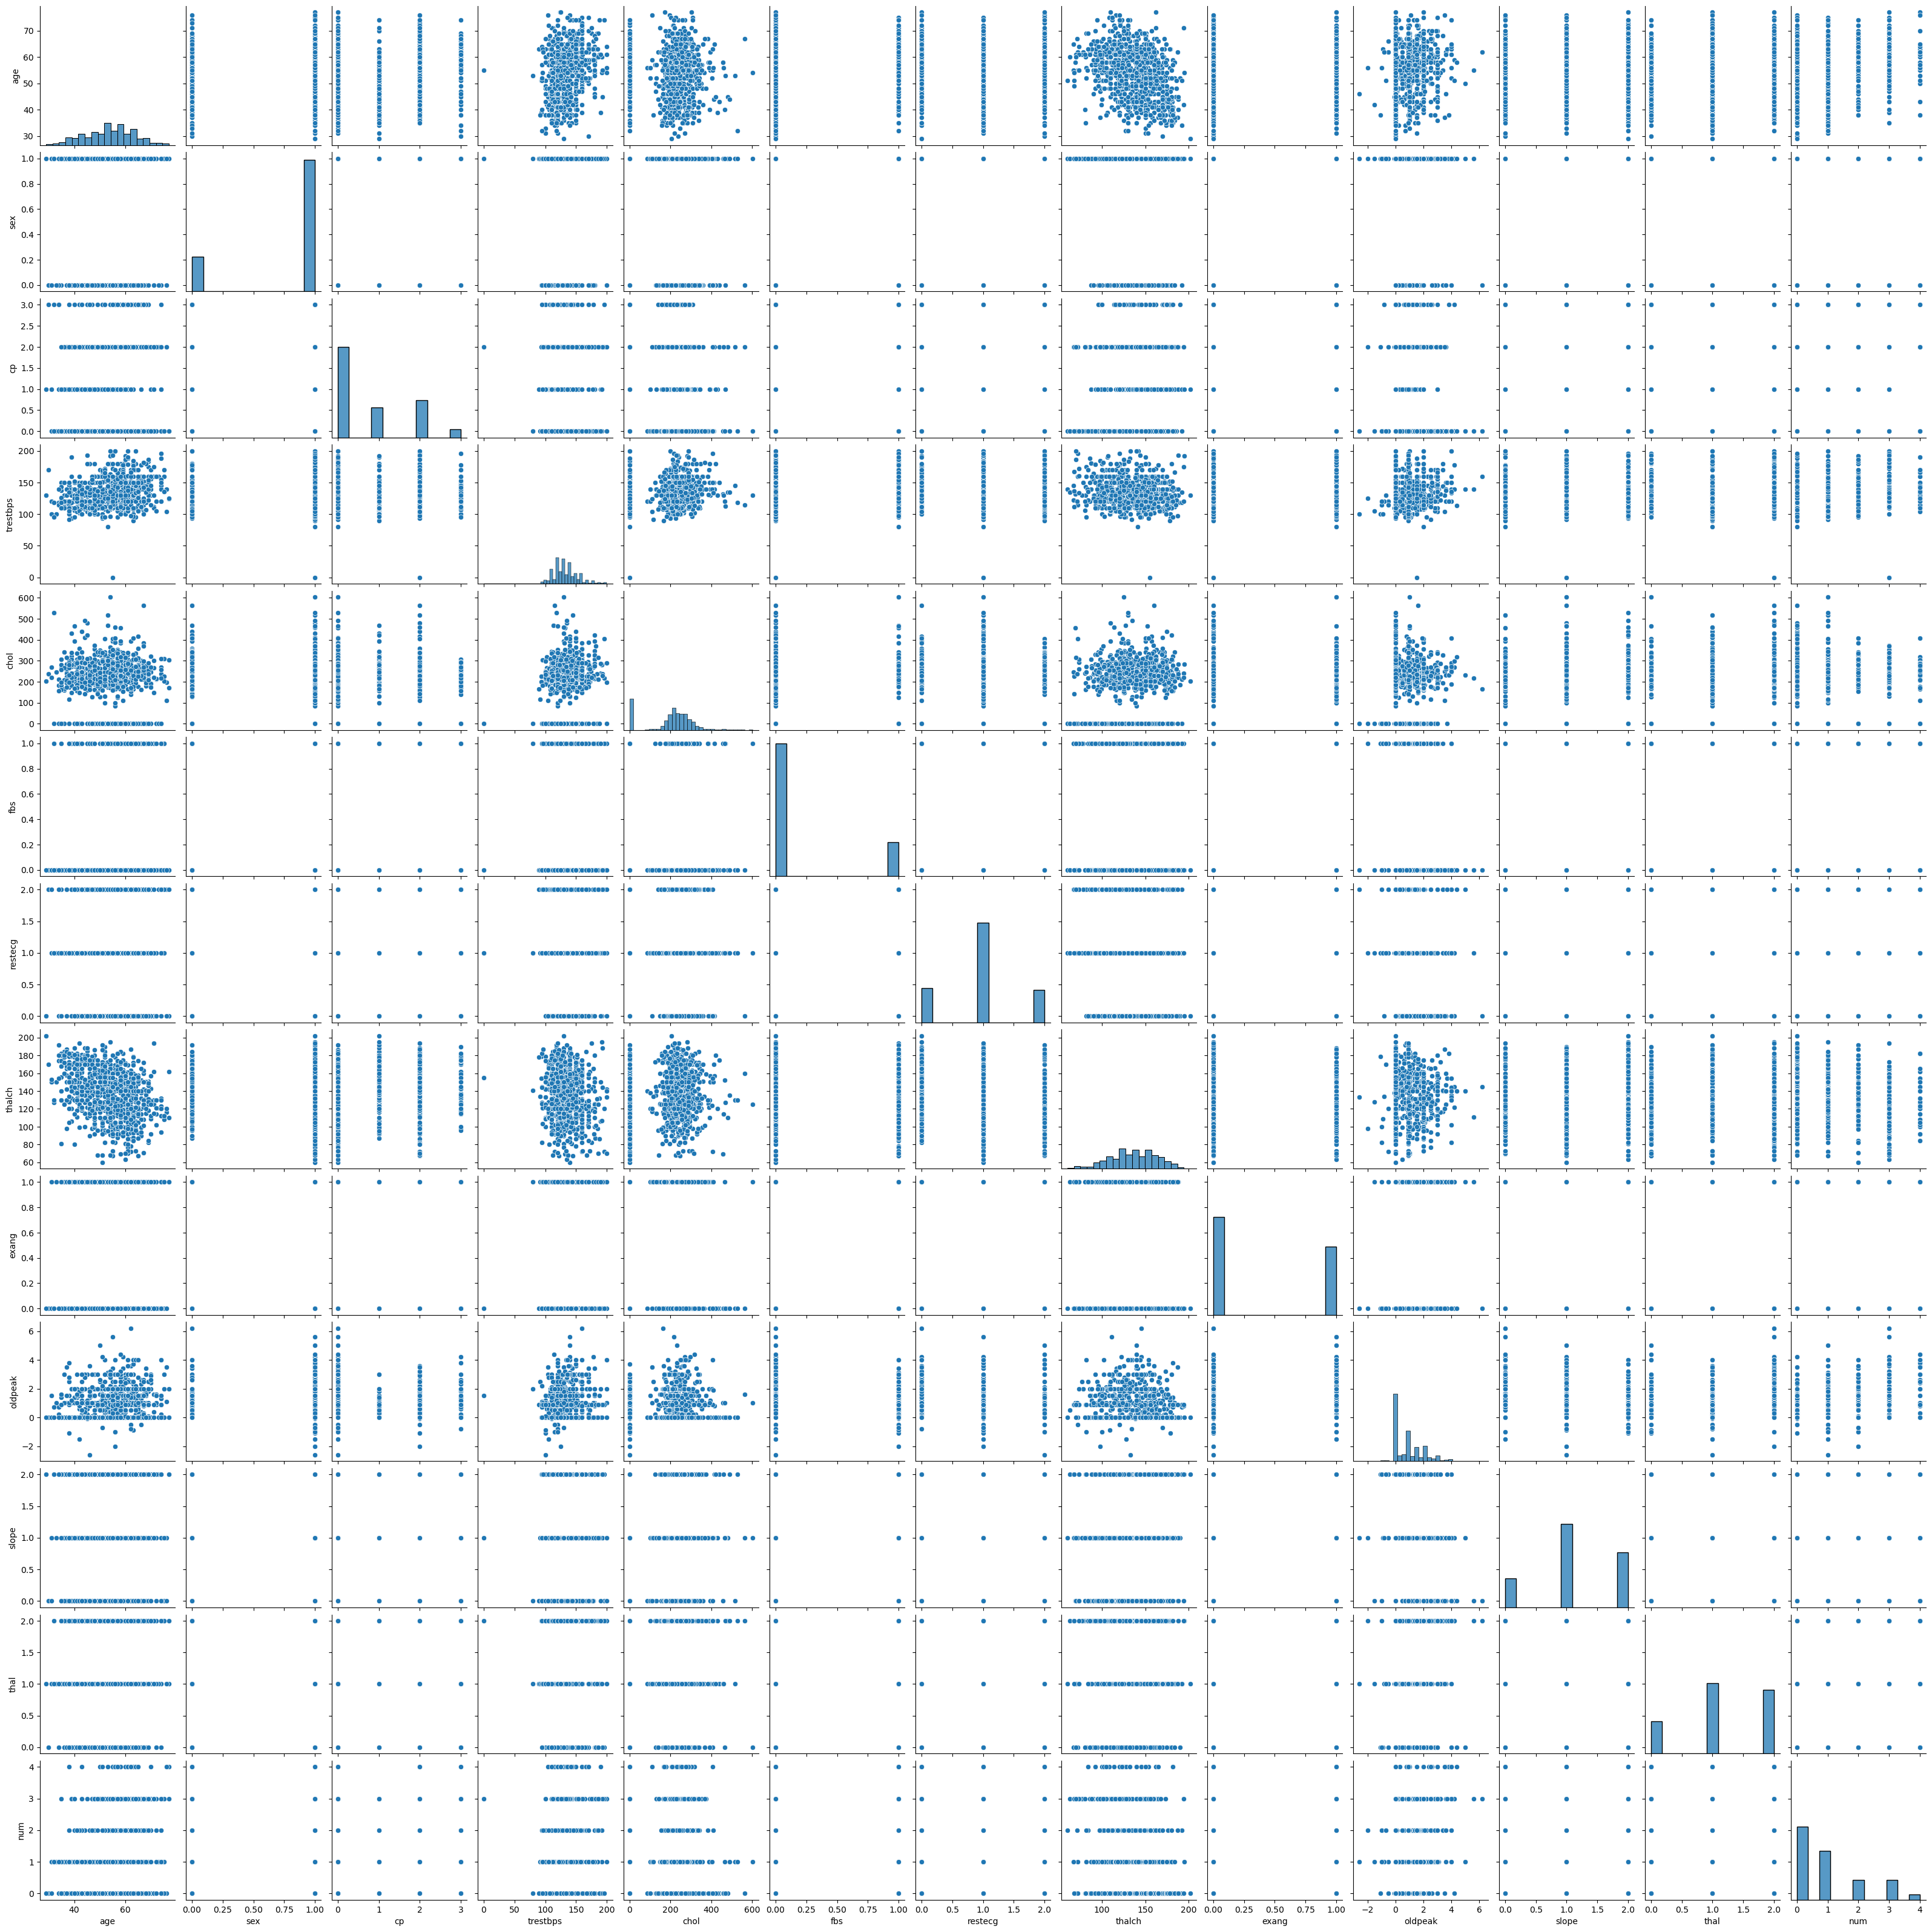

In [20]:
#pairplot

sns.pairplot(data)
plt.show()

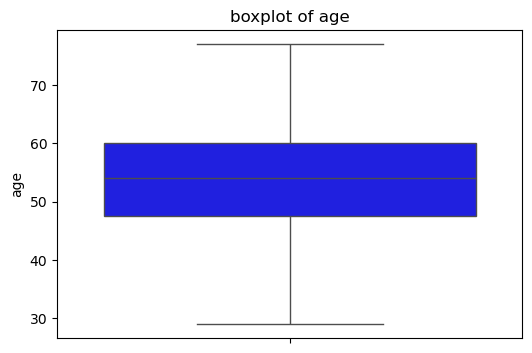

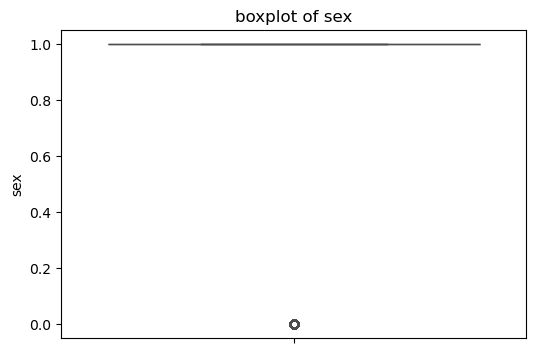

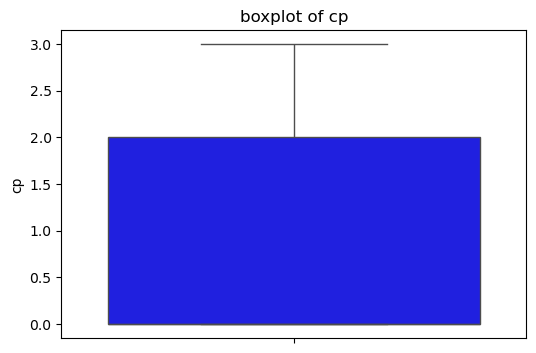

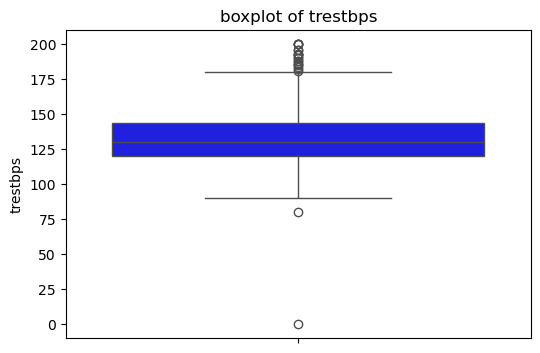

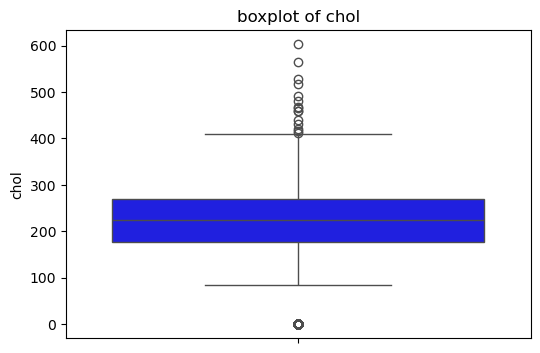

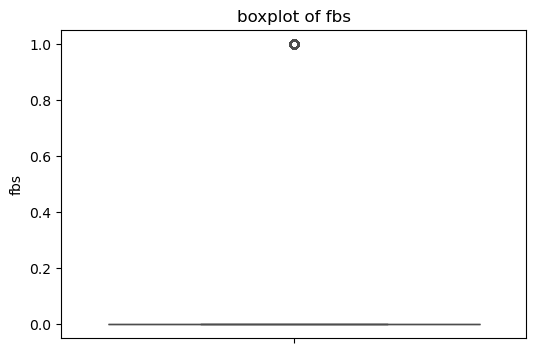

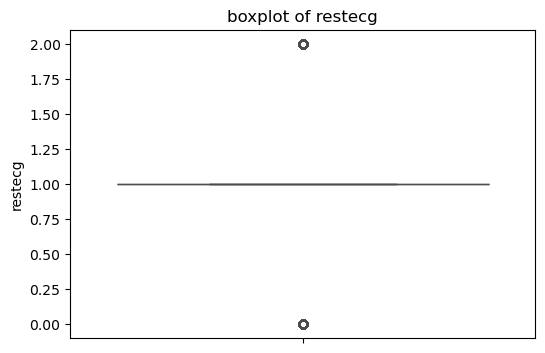

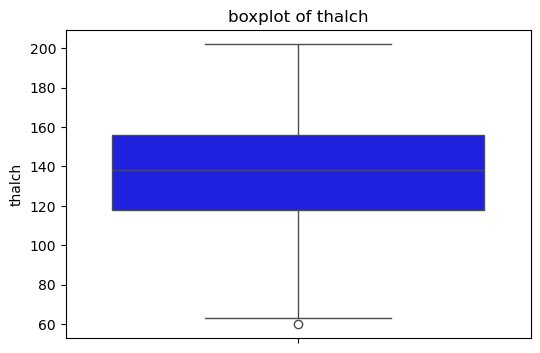

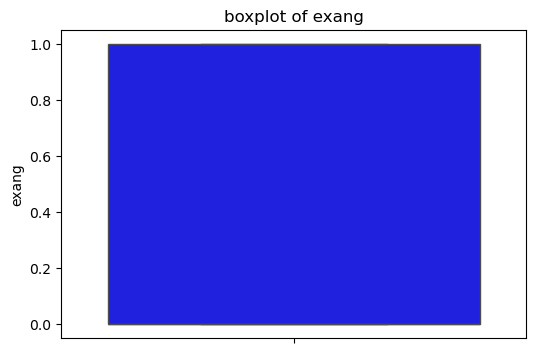

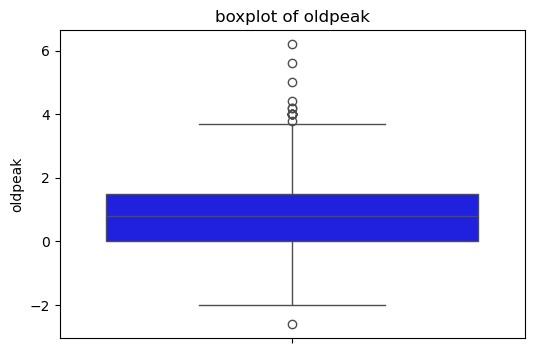

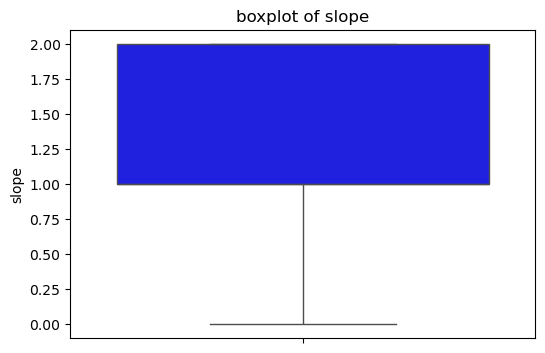

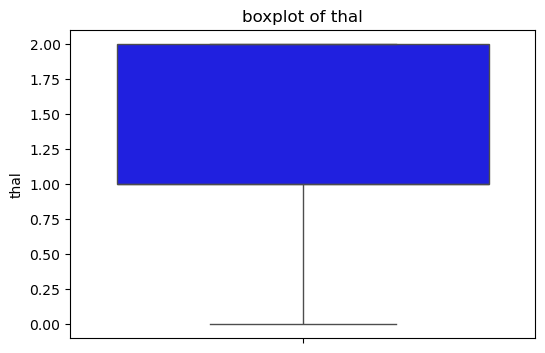

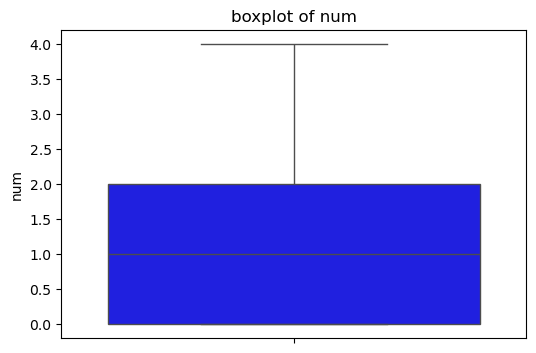

In [21]:
#Create boxplots for to identify outliers.

for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col],color='blue')
    plt.title(f'boxplot of {col}')
    plt.show()

#### 4. Decision Tree Classification:

##### Split the dataset into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = data.drop('num',axis=1)
y = data['num']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((725, 12), (182, 12), (725,), (182,))

##### Implement a Decision Tree Classification model 

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=10,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [29]:
def evaluate_clf(y,yhat):
    cm = confusion_matrix(y,yhat)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm,annot=True,fmt='d',cmap='mako',cbar=False)
    plt.show()
    print(classification_report(y,yhat,zero_division=0))

In [30]:
# evaluate the model on training data
yhat_train = dtree.predict(X_train)

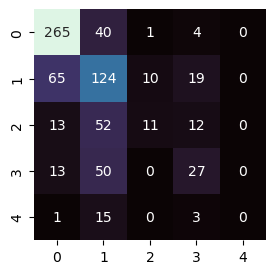

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       310
           1       0.44      0.57      0.50       218
           2       0.50      0.12      0.20        88
           3       0.42      0.30      0.35        90
           4       0.00      0.00      0.00        19

    accuracy                           0.59       725
   macro avg       0.42      0.37      0.37       725
weighted avg       0.56      0.59      0.56       725



In [31]:
evaluate_clf(y_train,yhat_train)

In [32]:
# evaluate the model on testing data
yhat_test = dtree.predict(X_test)

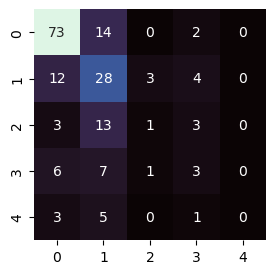

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        89
           1       0.42      0.60      0.49        47
           2       0.20      0.05      0.08        20
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.32      0.33      0.31       182
weighted avg       0.52      0.58      0.54       182



In [33]:
evaluate_clf(y_test,yhat_test)

#### 5. Hyperparameter Tuning:

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
    'max_depth' : [None,3,5,7,10,15],
    'min_samples_split' : [2,5,10,20],
    'criterion' : ['gini','entropy']
}

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [38]:
print('best parameters:',grid_search.best_params_)
print('best cross-validation accuracy:',grid_search.best_score_)

best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
best cross-validation accuracy: 0.5420689655172414


In [39]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

In [40]:
print('test accuracy:',accuracy_score(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))

test accuracy: 0.5604395604395604

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77        89
           1       0.44      0.45      0.44        47
           2       0.18      0.10      0.13        20
           3       0.25      0.24      0.24        17
           4       0.00      0.00      0.00         9

    accuracy                           0.56       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.50      0.56      0.53       182



#### 6. Model Evaluation and Analysis:

In [43]:
!pip install yellowbrick

In [44]:
from yellowbrick.classifier import ROCAUC

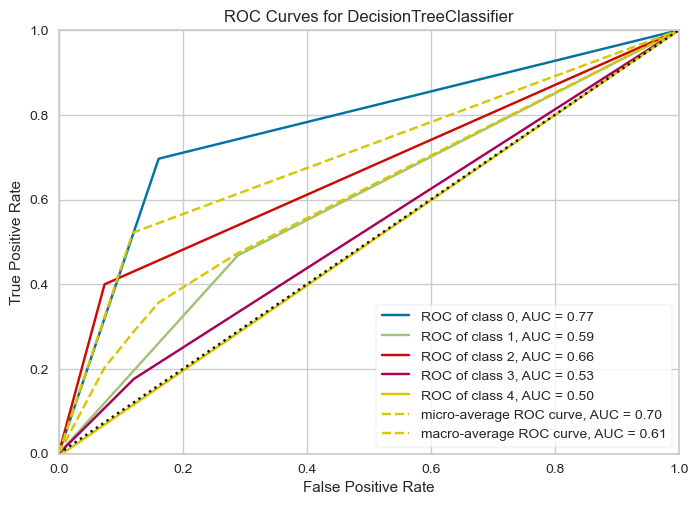

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
model = DecisionTreeClassifier()
visualizer = ROCAUC(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [46]:
from sklearn.tree import plot_tree

In [47]:
fnames = X.columns.values
fnames

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'], dtype=object)

In [48]:
cnames = data['num'].unique()
cnames = [str(c) for c in cnames]
cnames

['0', '1', '2', '3', '4']

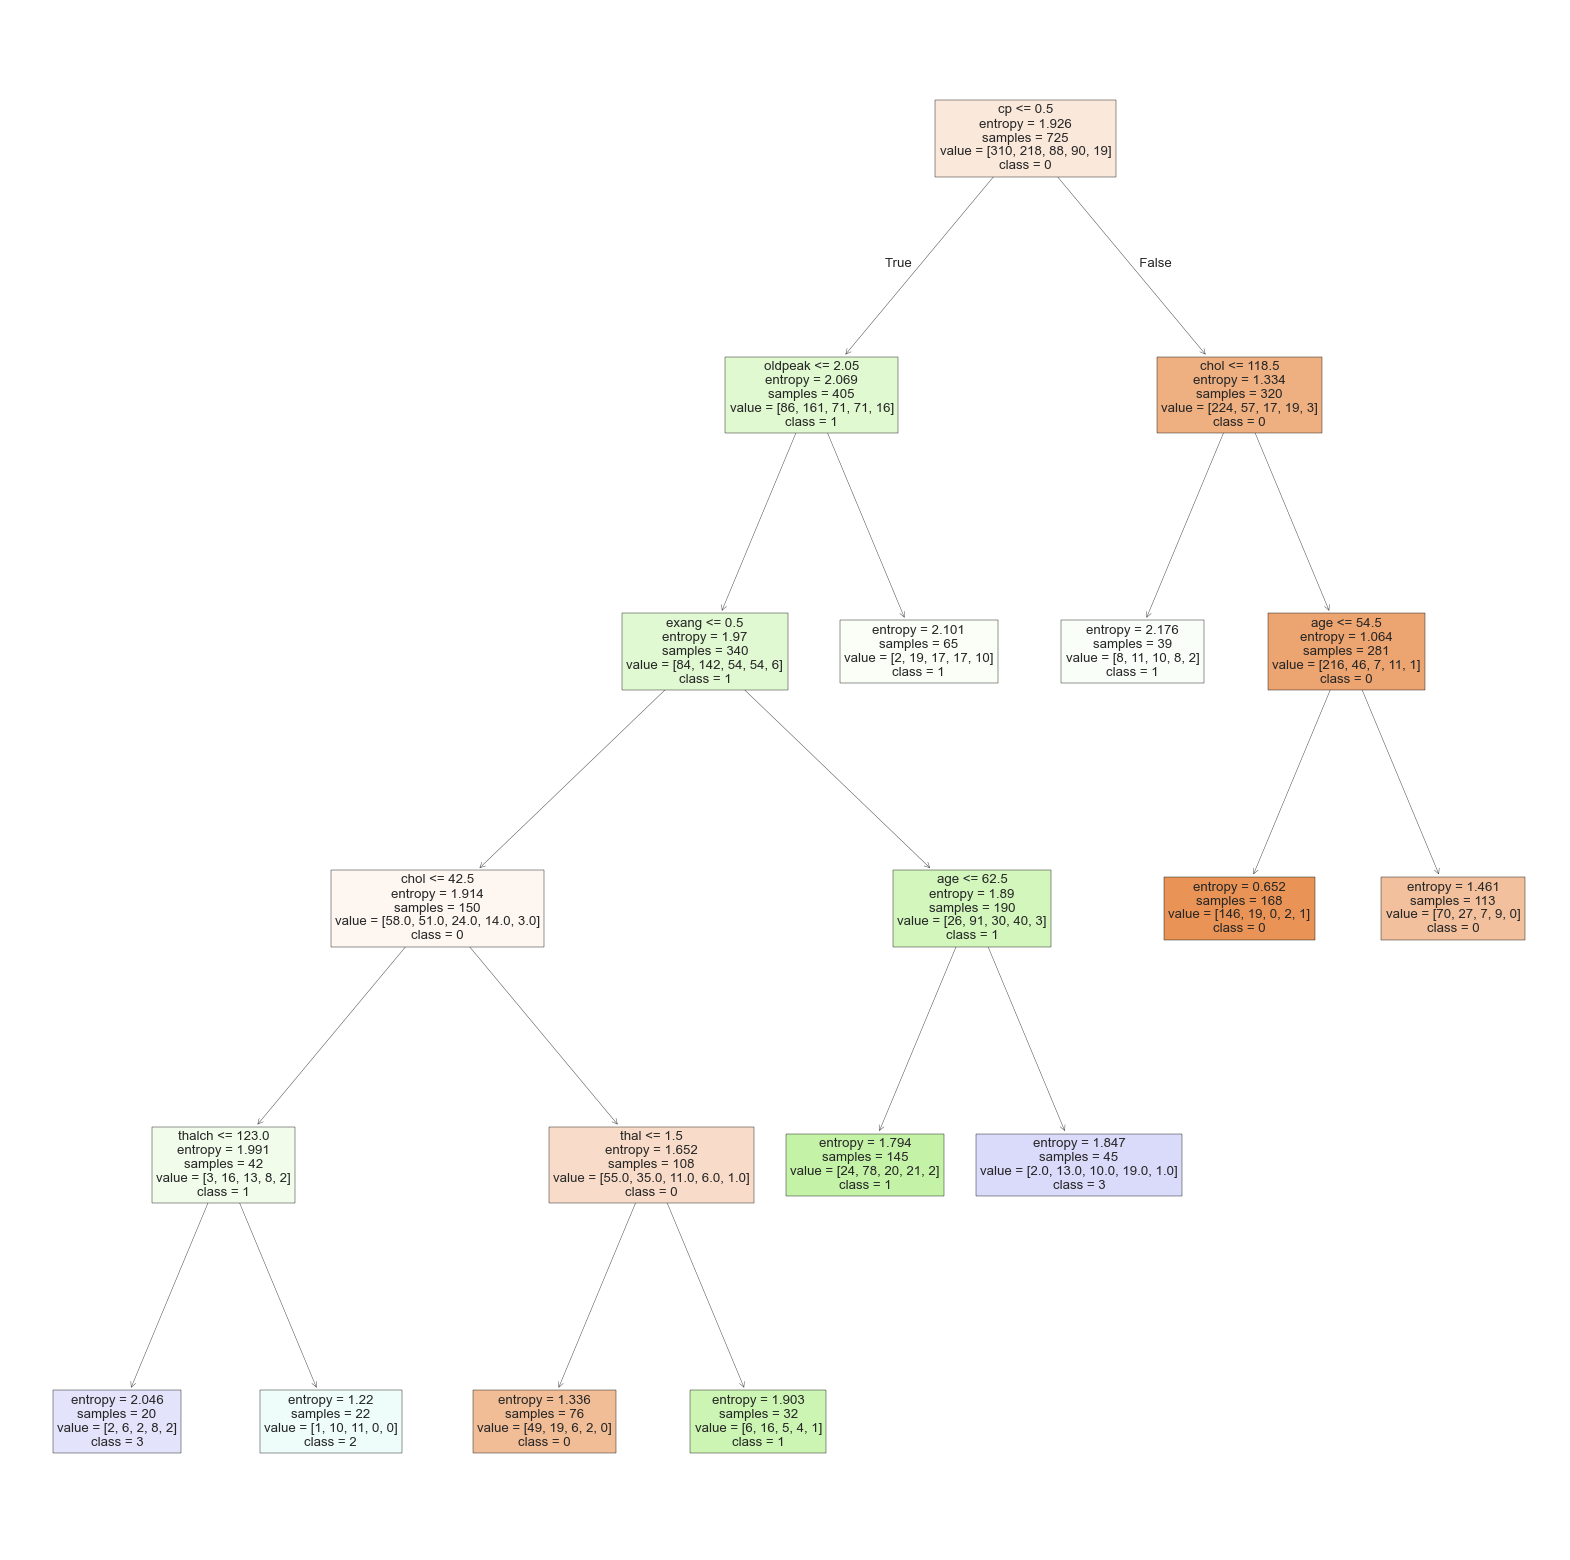

In [49]:
plt.figure(figsize=(20,20))
plot_tree(dtree,class_names=cnames,feature_names=fnames,filled=True)
plt.show()

## Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
    common decision tree hyperparameters include max_depth (limits tree depth,shallow-> underfit, deep->overfit), min_samples_split and min_samples_leaf(control node/leaf size, small->overfit,large -> underfit), and criterion(gini or entropy for split quality) 

### 2. What is the difference between the Label encoding and One-hot encoding?
    label encoding assigns a unique numeric value to each category(e.g, red=0,blue=1,green=2) which can imply an order that dosen't exist.
    one-hot encoding creates separate binary columns for each category, avoding order but increasing dimensionality